# Assignment 3

## Missing Values

Check for missing values.  If there are any missing values, deal with them appropriately.
Provide written justification explaining why you selected particular methods for dealing with missing values


In [1]:
import pandas as pd
import numpy as np


In [2]:
ld = pd.read_csv("loan_data.csv")
#ld.head()
#ld.tail()

In [3]:
ld.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing data inputs in: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.

In [4]:
ld.groupby(["Gender"]).agg({'Gender':'count'})

Gender
Gender        
Female     112
Male       489

This data seems to be stemming from an internal system documenting loan applicants' status and information.  This would suggest that any missing data is not reflective of a deliberate issue, or missing at random. 

Since Gender is a non-numeric, discrete variable and it has a high preference towards men in this dataset, it is appropriate to fill in the missing values with male and feel relativley safe on that assumption.

In [5]:
mod_ld = ld
mod_ld["Gender"].fillna("Male", inplace=True)
mod_ld.groupby(["Gender"]).agg({'Gender':'count'})

Gender
Gender        
Female     112
Male       502

The number of missing data entries related to marital status is quite low, 3, and therefore it is most appropriate to delete these entries to eliminate the missing variables.

<AxesSubplot:>

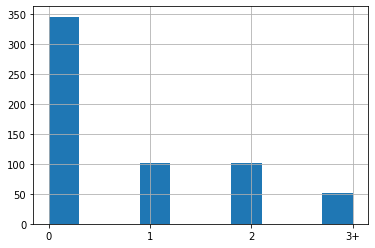

In [6]:
ld['Dependents'].hist()

Dependents data is not normally distributed, nor is it predictable in order to impute missing values.  Since the number of missing values remains low, we shall drop these rows from our dataset.

In [7]:
ld.groupby(["Self_Employed"]).agg({'Self_Employed':'count'})

Self_Employed
Self_Employed               
No                       500
Yes                       82

Since employment status is a non-numeric, discrete variable and it has a high preference towards No in this dataset, it is appropriate to fill in the missing values with no and feel relativley safe on that assumption.

In [8]:
mod_ld["Self_Employed"].fillna("No", inplace=True)
mod_ld.groupby(["Self_Employed"]).agg({'Self_Employed':'count'})

Self_Employed
Self_Employed               
No                       532
Yes                       82

LoanAmount, Credit_History, and Loan_Amount_Term are very important to what we are trying to assess, so the data that is missing shall be cut from the dataframe.

The goal of the model is to predict whether or not someone will get a loan, so not providing the loan amount information is a potential source of incorrect data if I fill it in with an average. Since the number of blank rows is relatively low, it is acceptable to drop these rows in favor of only using accurate data.

<AxesSubplot:>

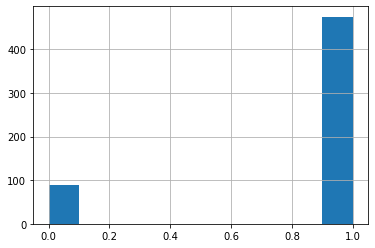

In [9]:
ld['Credit_History'].hist()

In [10]:
ld.groupby(["Credit_History"]).agg({'Credit_History':'count'})

Credit_History
Credit_History                
0.0                         89
1.0                        475

In [11]:
mod_ld["Credit_History"].fillna("1", inplace=True)

<AxesSubplot:>

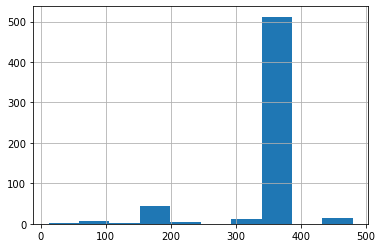

In [12]:
ld['Loan_Amount_Term'].hist(bins=10)

In [13]:
ld.groupby(["Loan_Amount_Term"]).agg({'Loan_Amount_Term':'count'})

Loan_Amount_Term
Loan_Amount_Term                  
12.0                             1
36.0                             2
60.0                             2
84.0                             4
120.0                            3
180.0                           44
240.0                            4
300.0                           13
360.0                          512
480.0                           15

In [14]:
mod_ld["Loan_Amount_Term"].fillna(360, inplace=True)

In [15]:
print("Missing values before dropping rows: ")
print(ld.isnull().sum())
print(ld.shape)

mod_ld = mod_ld.dropna()

print("Missing values after dropping rows: ")
print(mod_ld.isnull().sum())
print(mod_ld.shape)

Missing values before dropping rows: 
Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
(614, 13)
Missing values after dropping rows: 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(579, 13)


## Outliers

Check for outliers.  Do we keep them or do we drop them?  Why? 
Provide written justification explaining why you decided to keep or drop outliers.

In [16]:
mod_ld.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       579.000000         579.000000  579.000000        579.000000
mean       5432.177893        1651.635440  146.816926        342.072539
std        6228.236981        2992.599435   86.343049         64.546233
min         150.000000           0.000000    9.000000         12.000000
25%        2879.000000           0.000000  100.000000        360.000000
50%        3775.000000        1229.000000  128.000000        360.000000
75%        5816.500000        2318.000000  169.000000        360.000000
max       81000.000000       41667.000000  700.000000        480.000000

In [17]:
mod_ld.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

The only data types with a possible outlier are numerical data types.  Our data frame has three columns of this type: Applicnat and Coapplicant Income, and Loan Amount.

While Dependents may seem to be a numerical data type, it has been categorized into 0, 1, 2, 3+, which makes it impossible to be considered a numerical type, so it will not be processed as a numerical data type.

<AxesSubplot:>

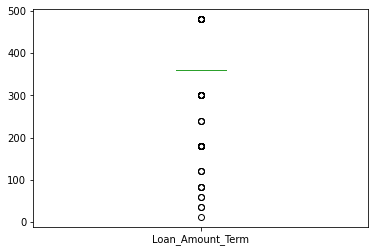

In [18]:
mod_ld['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

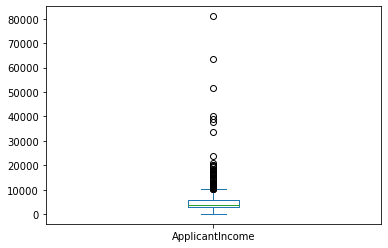

In [19]:
mod_ld['ApplicantIncome'].plot.box()

<AxesSubplot:>

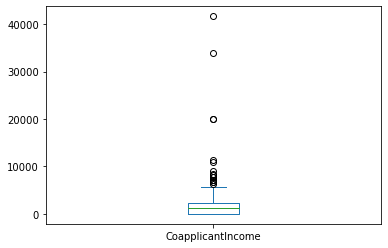

In [20]:
mod_ld['CoapplicantIncome'].plot.box()

<AxesSubplot:>

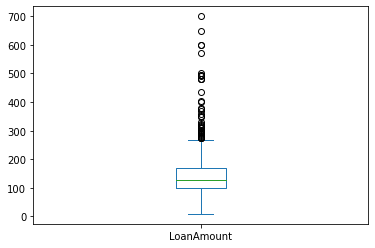

In [21]:
mod_ld['LoanAmount'].plot.box()

it appears that every column analysed has realistic outliers, so I will look at the histogram of each column.

<Figure size 432x288 with 0 Axes>

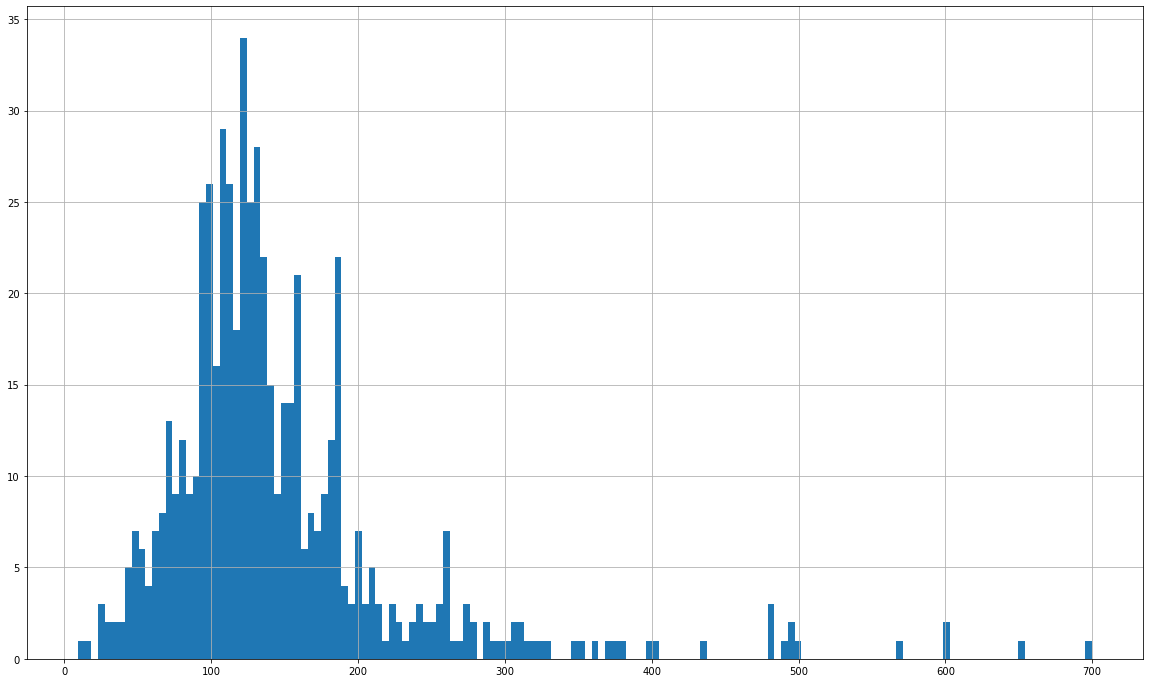

<Figure size 432x288 with 0 Axes>

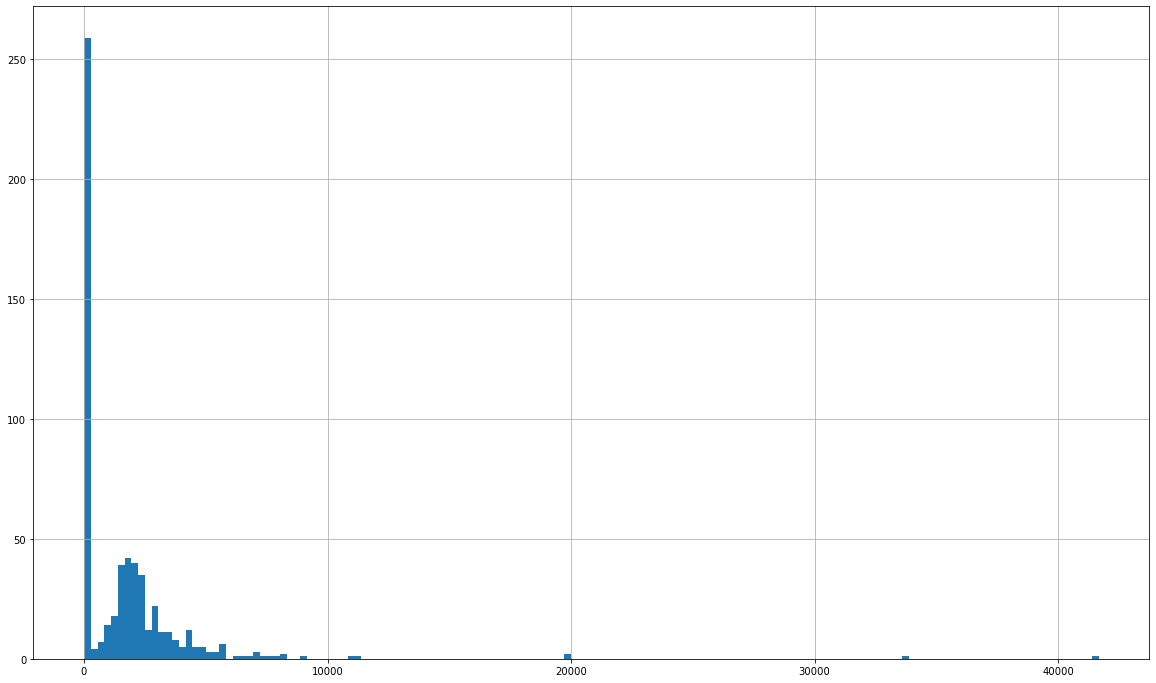

<Figure size 432x288 with 0 Axes>

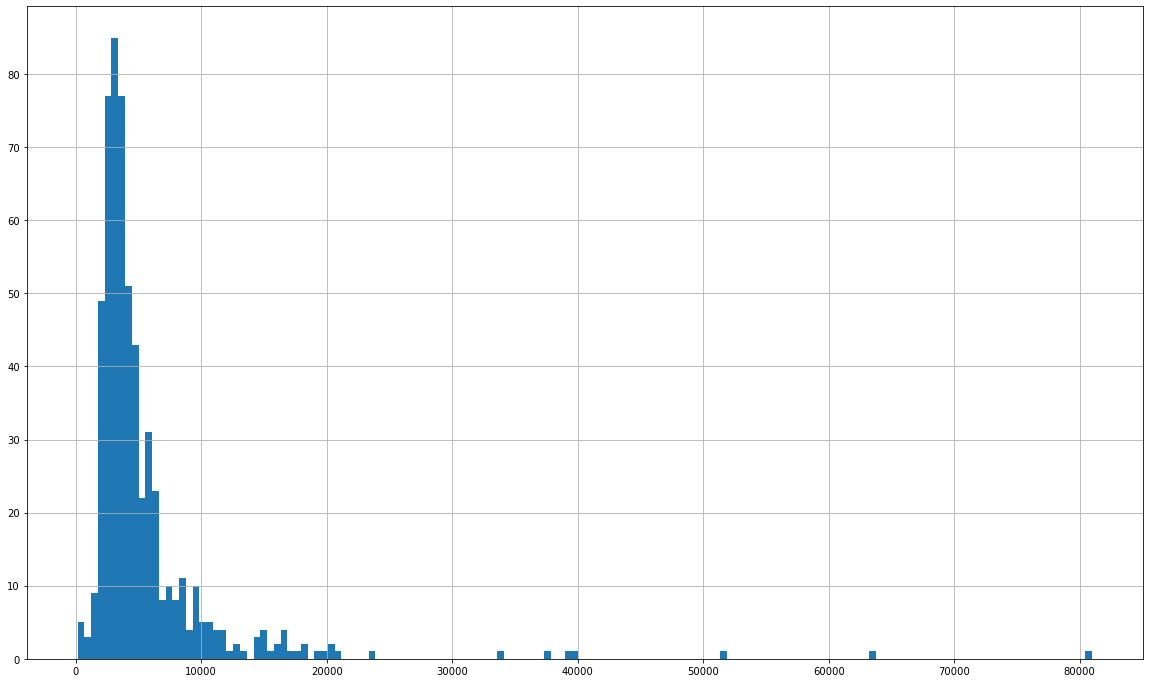

<Figure size 432x288 with 0 Axes>

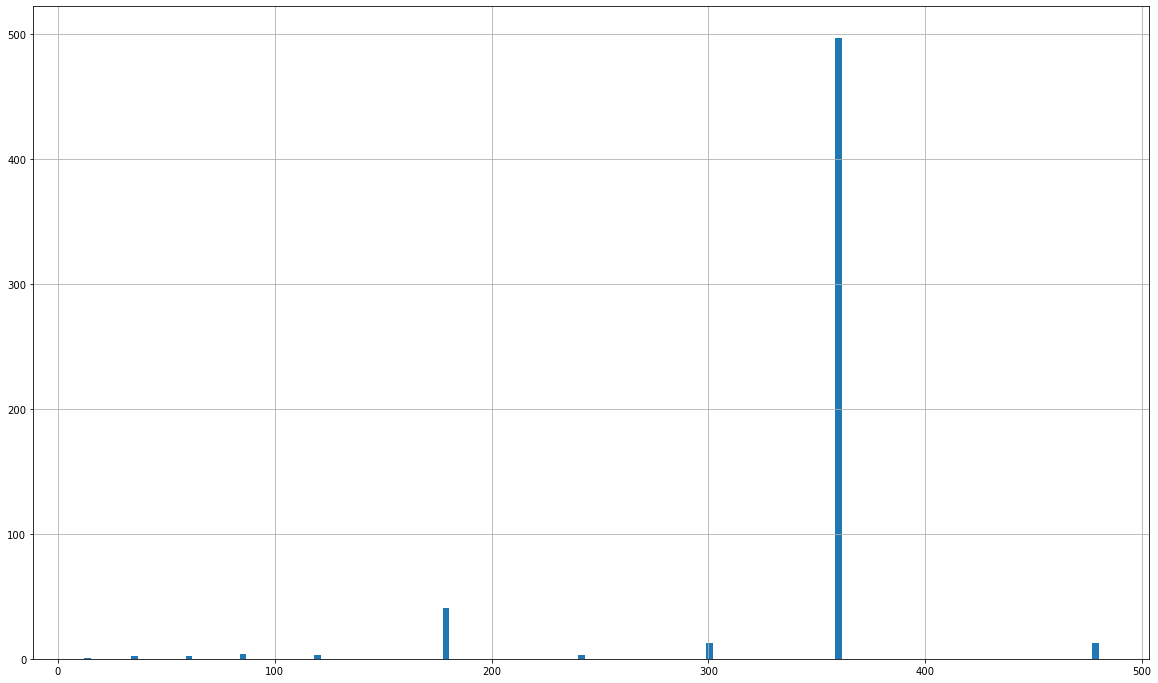

In [22]:
import matplotlib.pyplot as plt

for col in mod_ld[['LoanAmount', 'CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term']].columns:
    
    plt.figure()
    plt.figure(figsize=(20, 12))
    mod_ld[col].hist(bins=150)
    plt.show()

Loan Amount, Applicant Income, and Coapplicant Income are all skewed to the left, with outliers only appearing on the high end of the data, this is consistent with the character of left skewed data, and therefore the outliers described are realistic and consistent with the relationship we will be analysing.  

Loan Amount Term has outliers on both high and low values of its data set, but these values are often repeated, therefore less likely to be mistakes in data input, and also these valuesare possible, so we will analyse them as real data values.

In [23]:
mod_ld.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       579.000000         579.000000  579.000000        579.000000
mean       5432.177893        1651.635440  146.816926        342.072539
std        6228.236981        2992.599435   86.343049         64.546233
min         150.000000           0.000000    9.000000         12.000000
25%        2879.000000           0.000000  100.000000        360.000000
50%        3775.000000        1229.000000  128.000000        360.000000
75%        5816.500000        2318.000000  169.000000        360.000000
max       81000.000000       41667.000000  700.000000        480.000000

## Discretizing

Discretize the following columns and explain why you chose particular discrete categories/ranges for the values

ApplicantIncome

CoapplicantIncome

LoanAmount

Loan_Amount_Term


https://www.javatpoint.com/discretization-in-data-mining

In [24]:
mod_ld.groupby(["Loan_Amount_Term"]).agg({'Loan_Amount_Term':'count'})

Loan_Amount_Term
Loan_Amount_Term                  
12.0                             1
36.0                             2
60.0                             2
84.0                             4
120.0                            3
180.0                           41
240.0                            3
300.0                           13
360.0                          497
480.0                           13

The category Loan Amount Term has no continuity in its variables, rather already pretty discrete values that often repeat.  Since this is the case I elected to make very small ranges for any values within, as variability seemed to be intentional and uncommon.  I decided to use ranges because I am uncertain of any formal process loan providers would use and therefore cannot assume there is not the possibility that a loan term might be different than the numbers I have already been given.  

In [25]:
mod_ld['Loan_Amount_Term_Binned']=pd.cut(x=mod_ld["Loan_Amount_Term"], bins=[0,60,120,180, 240, 300, 360, 420, 480])
mod_ld.head()

C:\Users\victo\AppData\Local\Temp\ipykernel_10532\1494890681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_ld['Loan_Amount_Term_Binned']=pd.cut(x=mod_ld["Loan_Amount_Term"], bins=[0,60,120,180, 240, 300, 360, 420, 480])


Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

  Credit_History Property_Area Loan_Status Loan_Amount_Term_Binned  
1            1.0         Rural           N              (300, 360]  
2            1.0         Urban           Y              (300, 360]  
3            1.0         Urban           Y              (300, 360]  
4            1.0         Urban           Y              (300, 360]  
5            1.0         Urban           Y              (300, 360]

The category Loan Amount is continuous, and highly variable, though it has a left skew.  When discretizing the data, I chose to break the data into ranges in order to reflect the continuity of the data.  I also binned the data without worrying about equal sizes of categories, instead of qcut. I did this since I consider the intensity of money asked for to be important in whether or not a loan is accepted, and therefore a unequal bin will not dampen the effects of high values by grouping them with lower values.

When determining bin sizes, I chose to make 14 bins, so that each bin contains a loan amount range of around 50.

In [26]:
mod_ld['Loan_Amount_Binned']=pd.cut(x=mod_ld["LoanAmount"], bins=14)
mod_ld.head()

C:\Users\victo\AppData\Local\Temp\ipykernel_10532\1850866557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_ld['Loan_Amount_Binned']=pd.cut(x=mod_ld["LoanAmount"], bins=14)


Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

  Credit_History Property_Area Loan_Status Loan_Amount_Term_Binned  \
1            1.0         Rural           N              (300, 360]   
2            1.0         Urban           Y              (300, 360]   
3            1.0         Urban           Y              (300, 360]   
4            1.0         Urban           Y              (300, 360]   
5            1.0         Urban           Y              (300, 360]   

   Loan_Amount_Binned  
1  (107.714, 157.071]  
2   (58.357, 107.714]  
3  (107.714, 157.071]  
4  (107.714, 157.071]  
5  (255.786, 305.143]

Applicant Income and Coapplicant Income are also continuous with a left skew, but have much more consistiencies with certain data amounts, and since salary is relative to others', it makes sense to group data into deciles to represent what the salary means relative to others.

In [27]:
mod_ld['ApplicantIncomeBinned']=pd.qcut(x=mod_ld["ApplicantIncome"],  q=10, precision=0)
mod_ld.head()
mod_ld.groupby(["ApplicantIncomeBinned"]).agg({'ApplicantIncomeBinned':'count'})

C:\Users\victo\AppData\Local\Temp\ipykernel_10532\410773115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_ld['ApplicantIncomeBinned']=pd.qcut(x=mod_ld["ApplicantIncome"],  q=10, precision=0)


ApplicantIncomeBinned
ApplicantIncomeBinned                       
(149.0, 2214.0]                           58
(2214.0, 2605.0]                          58
(2605.0, 3065.0]                          58
(3065.0, 3401.0]                          58
(3401.0, 3775.0]                          58
(3775.0, 4333.0]                          58
(4333.0, 5189.0]                          57
(5189.0, 6264.0]                          58
(6264.0, 9505.0]                          58
(9505.0, 81000.0]                         58

In [28]:
mod_ld['CoapplicantIncomeBinned']=pd.qcut(x=mod_ld["CoapplicantIncome"],  q=20, precision=0, duplicates = 'drop')
mod_ld.head()
mod_ld.groupby(["CoapplicantIncomeBinned"]).agg({'CoapplicantIncomeBinned':'count'})

C:\Users\victo\AppData\Local\Temp\ipykernel_10532\1156608327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_ld['CoapplicantIncomeBinned']=pd.qcut(x=mod_ld["CoapplicantIncome"],  q=20, precision=0, duplicates = 'drop')


CoapplicantIncomeBinned
CoapplicantIncomeBinned                         
(-1.0, 486.0]                                261
(486.0, 1229.0]                               29
(1229.0, 1507.0]                              28
(1507.0, 1716.0]                              29
(1716.0, 1874.0]                              29
(1874.0, 2083.0]                              31
(2083.0, 2318.0]                              27
(2318.0, 2552.0]                              29
(2552.0, 3057.0]                              29
(3057.0, 3815.0]                              29
(3815.0, 5063.0]                              29
(5063.0, 41667.0]                             29

## Determine Predictors

Think about which features make sense as predictors.  DO NOT use all features as predictors in your model.  
Provide a written justification explaining why you selected certain features and excluded others


My choosing of features is dependent on both the data I have and my guess as to the strength of correlation each variable may have towards whether or not a loan is accepted.  

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

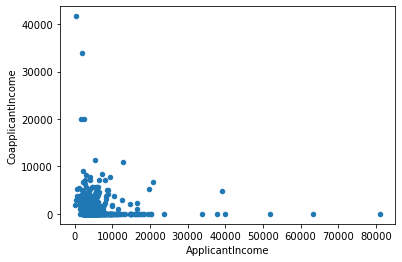

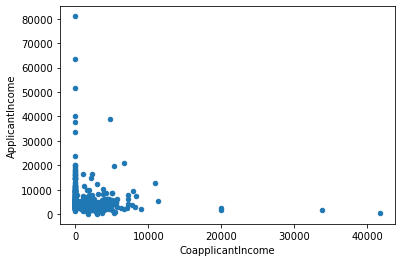

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

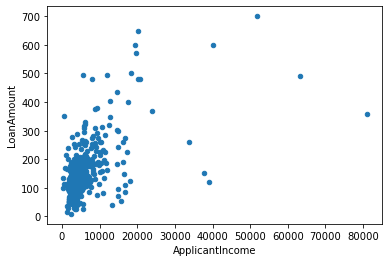

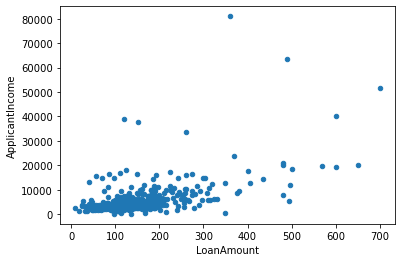

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

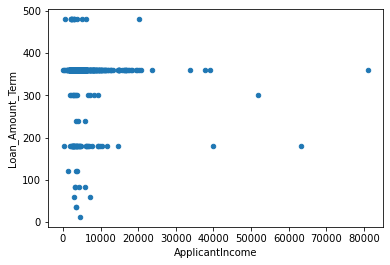

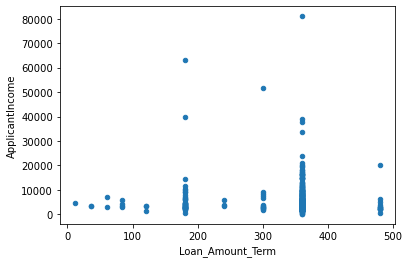

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

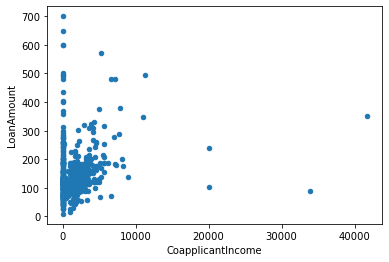

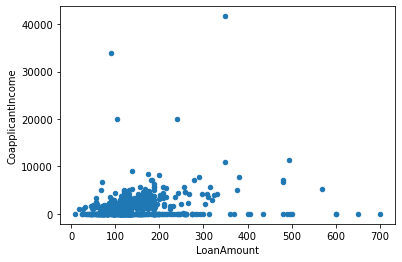

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

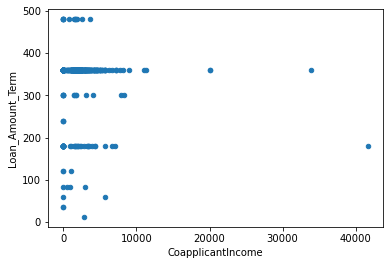

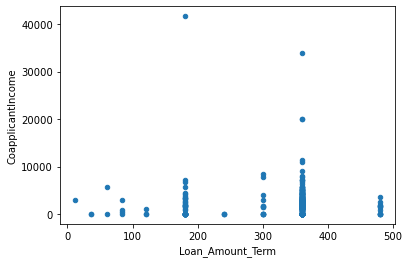

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

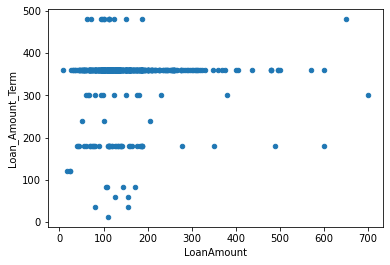

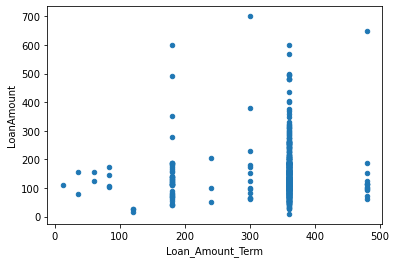

In [29]:
import matplotlib.pyplot as plt
from itertools import combinations
for item in (list(combinations(mod_ld[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].columns, 2))):
    plt.figure()
    plt.figure(figsize=(20, 12))
    mod_ld.plot.scatter(x=item[0],y=item[1])
    plt.show()
    mod_ld.plot.scatter(x=item[1],y=item[0])
    plt.show()

In [30]:
c = mod_ld.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
for idx, row in pd.DataFrame(so).iterrows():
    if row[0] < 1:
        print(row)

0    0.571034
Name: (ApplicantIncome, LoanAmount), dtype: float64
0    0.571034
Name: (LoanAmount, ApplicantIncome), dtype: float64
0    0.189087
Name: (CoapplicantIncome, LoanAmount), dtype: float64
0    0.189087
Name: (LoanAmount, CoapplicantIncome), dtype: float64
0    0.115165
Name: (ApplicantIncome, CoapplicantIncome), dtype: float64
0    0.115165
Name: (CoapplicantIncome, ApplicantIncome), dtype: float64
0    0.058617
Name: (CoapplicantIncome, Loan_Amount_Term), dtype: float64
0    0.058617
Name: (Loan_Amount_Term, CoapplicantIncome), dtype: float64
0    0.048961
Name: (ApplicantIncome, Loan_Amount_Term), dtype: float64
0    0.048961
Name: (Loan_Amount_Term, ApplicantIncome), dtype: float64
0    0.036882
Name: (LoanAmount, Loan_Amount_Term), dtype: float64
0    0.036882
Name: (Loan_Amount_Term, LoanAmount), dtype: float64


Looking at the numerical data, there is no obvious correlation that suggests that one variable can be substituited for another. 

It is also important to analyse whether or not any data is repetitive to the point of low levels of variance.  

In [31]:
mod_ld.groupby(["Gender"]).agg({'Gender':'count'})

Gender
Gender        
Female     107
Male       472

In [32]:
mod_ld.groupby(["Credit_History"]).agg({'Credit_History':'count'})

Credit_History
Credit_History                
0.0                         80
1.0                        450
1                           49

In [33]:
mod_ld.groupby(["Married"]).agg({'Married':'count'})

Married
Married         
No           202
Yes          377

In [34]:
mod_ld.groupby(["Education"]).agg({'Education':'count'})

Education
Education              
Graduate            456
Not Graduate        123

In [35]:
ld.groupby(["Self_Employed"]).agg({'Self_Employed':'count'})

Self_Employed
Self_Employed               
No                       532
Yes                       82

In [36]:
ld.groupby(["Property_Area"]).agg({'Property_Area':'count'})

Property_Area
Property_Area               
Rural                    179
Semiurban                233
Urban                    202

For these data types, it is clear that Self-Employment, credit history and Gender do not vary much in this data set.  It is therefore more logical to eliminate these options as they do not provide us with enough variance to have much of a say on their affect on the output.  

In [37]:
df = mod_ld
df = df.drop(columns=['Self_Employed', 'Gender', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome'])

For categorical columns (after you’ve dealt with missing values and after you have reduced the number of categories) make sure to LabelEncode your values


In [38]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Education'] = labelencoder.fit_transform(df['Education'])
df['Married'] = labelencoder.fit_transform(df['Married'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])
df['Loan_Amount_Term_Binned'] = labelencoder.fit_transform(df['Loan_Amount_Term_Binned'])
df['Loan_Amount_Binned'] = labelencoder.fit_transform(df['Loan_Amount_Binned'])
df['ApplicantIncomeBinned'] = labelencoder.fit_transform(df['ApplicantIncomeBinned'])
df['CoapplicantIncomeBinned'] = labelencoder.fit_transform(df['CoapplicantIncomeBinned'])



df.head()

Loan_ID  Married  Dependents  Education  Property_Area  Loan_Status  \
1  LP001003        1           1          0              0            0   
2  LP001005        1           0          0              2            1   
3  LP001006        1           0          1              2            1   
4  LP001008        0           0          0              2            1   
5  LP001011        1           2          0              2            1   

   Loan_Amount_Term_Binned  Loan_Amount_Binned  ApplicantIncomeBinned  \
1                        5                   2                      6   
2                        5                   1                      2   
3                        5                   2                      1   
4                        5                   2                      7   
5                        5                   5                      7   

   CoapplicantIncomeBinned  
1                        3  
2                        0  
3                        7  
4                        0  
5                       10

## Train Model

Train and evaluate three classification models, using any combination of Naive Bayes, SVM, KNN, LogisticRegression, DecisionTree, or RandomForest algorithms.  Your models must predict the Loan_Status.
Justify why you selected a particular algorithm based on your review of the data and based on the strengths and weaknesses of each of the algorithms discussed in the class and presented in the slides


The first model I chose to train was a SVM Model.  My reasoning for this was wanting to test a large amount of variables, where numerical data did not define distance.  

Skeleton of SVM credit to: https://vitalflux.com/classification-model-svm-classifier-python-example/

In [39]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [40]:
X = df[['Married', 'Dependents', 'Education', 'Property_Area', 'Loan_Amount_Term_Binned', 'Loan_Amount_Binned', 'ApplicantIncomeBinned', 'CoapplicantIncomeBinned']]
y = df['Loan_Status']
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [42]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.695


In [43]:
X = df[['Dependents', 'Education', 'Property_Area', 'Loan_Amount_Term_Binned', 'Loan_Amount_Binned', 'ApplicantIncomeBinned', 'CoapplicantIncomeBinned']]
y = df['Loan_Status']
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.695


Next we will try Naive Bayes as it works well with categorical data, and works well with many variables.

Gaussian NB Skeleton provided by: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

In [61]:
X = df[['Education', 'Property_Area', 'Loan_Amount_Term_Binned', 'Loan_Amount_Binned', 'ApplicantIncomeBinned', 'CoapplicantIncomeBinned']]
y = df['Loan_Status']
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("Accuracy Score: " + ac.astype('str'))

Accuracy Score: 0.6954022988505747


I would have used decision trees because of their ability to interpret categorical data but I honestly could not figure out a bug I had and I am tired.  

I decided to use kNN because of its ability to handle large amounts of data.

In [59]:
X = df[['Married', 'Dependents', 'Education', 'Property_Area', 'Loan_Amount_Term_Binned', 'Loan_Amount_Binned', 'ApplicantIncomeBinned', 'CoapplicantIncomeBinned']]
y = df['Loan_Status']
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 9 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=9 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=9 is 0.6954022988505747


## Evaluate

Report each model’s accuracy score
Report each model’s AUC score
Compare accuracy for the three models and make a recommendation as to which model performed best


Experiment with counterfactuals - try to change inputs into your best model and see how it affect predictions.  Describe what factors seem to influence loan approvals the most based on your counterfactuals observations.
Write a paragraph (as markdown) explaining whether or not your best  model is “good” and why


Surprisingly, my best of each model remained at almost the same accuracy score.  No matter what columns I used to assess the data, the best I could get was always .695.  This makes it quite hard to compare these models from score alone, but I note that SVM's accuracy score remained high no matter what was or wasn't placed in front of it, so if I were to use a model, it would be that one.  